In [1]:
pip install pandas numpy scikit-learn mlxtend prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 919.0 kB/s eta 0:00:15
   ---------------------------------------- 0.1/13.3 MB 919.0 kB/s eta 0:00:15
   ---------------------------------------- 0.1/13.3 MB 657.1 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 657.1 kB/s eta 0:00:21
    --------------------------------------- 0.3/13.3 MB 862.0 kB/s eta 0:00:16
    --------------------------------------- 0.3/13.3 MB 862.0 kB/s eta 0:00:16
    --------------------------------------- 0.3/13.3 MB 813.9 kB/s eta 0:00:16
   - -------------------------------------- 0.4/13.3 MB 960.7 kB/s eta 0:00:14
   - -------------------------------------- 0.5/13.3 MB 1.1 MB/s eta 0:00:13
   -- ------------------------------------- 0.7/13.3 MB 1.3 MB/s eta 0:00:11
   -

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\LENOVO\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [ ]:
df = pd.read_csv("online_retail.csv")
print("Original dataset shape:", df.shape)

print(df.head())
print(df.info())

Original dataset shape: (525461, 8)
  Transaction_ID Product_Code                        Product_Title  \
0         489434        85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1         489434       79323P                   PINK CHERRY LIGHTS   
2         489434       79323W                  WHITE CHERRY LIGHTS   
3         489434        22041         RECORD FRAME 7" SINGLE SIZE    
4         489434        21232       STRAWBERRY CERAMIC TRINKET BOX   

   Units_Sold Transaction_Timestamp  Unit_Cost  Client_ID   Client_Region  
0          12      01-12-2009 07:45       6.95    13085.0  United Kingdom  
1          12      01-12-2009 07:45       6.75    13085.0  United Kingdom  
2          12      01-12-2009 07:45       6.75    13085.0  United Kingdom  
3          48      01-12-2009 07:45       2.10    13085.0  United Kingdom  
4          24      01-12-2009 07:45       1.25    13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data colu

In [123]:
df.columns

Index(['Transaction_ID', 'Product_Code', 'Product_Title', 'Units_Sold',
       'Transaction_Timestamp', 'Unit_Cost', 'Client_ID', 'Client_Region'],
      dtype='object')

In [124]:
df = df.drop_duplicates()
print(df)
df.columns = df.columns.str.strip()
print(df.columns)

       Transaction_ID Product_Code                        Product_Title  \
0              489434        85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1              489434       79323P                   PINK CHERRY LIGHTS   
2              489434       79323W                  WHITE CHERRY LIGHTS   
3              489434        22041         RECORD FRAME 7" SINGLE SIZE    
4              489434        21232       STRAWBERRY CERAMIC TRINKET BOX   
...               ...          ...                                  ...   
525456         538171        22271                 FELTCRAFT DOLL ROSIE   
525457         538171        22750         FELTCRAFT PRINCESS LOLA DOLL   
525458         538171        22751       FELTCRAFT PRINCESS OLIVIA DOLL   
525459         538171        20970   PINK FLORAL FELTCRAFT SHOULDER BAG   
525460         538171        21931               JUMBO STORAGE BAG SUKI   

        Units_Sold Transaction_Timestamp  Unit_Cost  Client_ID   Client_Region  
0               12

In [125]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Transaction_ID                0
Product_Code                  0
Product_Title              2928
Units_Sold                    0
Transaction_Timestamp         0
Unit_Cost                     0
Client_ID                107833
Client_Region                 0
dtype: int64


In [126]:
print(df.columns)


Index(['Transaction_ID', 'Product_Code', 'Product_Title', 'Units_Sold',
       'Transaction_Timestamp', 'Unit_Cost', 'Client_ID', 'Client_Region'],
      dtype='object')


In [127]:
 #Drop rows with missing essential fields
df.dropna(subset=['Client_ID', 'Product_Title', 'Transaction_Timestamp'], inplace=True)

In [128]:
#  Convert Transaction Timestamp to datetime
df['Transaction_Timestamp'] = pd.to_datetime(df['Transaction_Timestamp'], errors='coerce')
df.dropna(subset=['Transaction_Timestamp'], inplace=True)

In [129]:
df.columns

Index(['Transaction_ID', 'Product_Code', 'Product_Title', 'Units_Sold',
       'Transaction_Timestamp', 'Unit_Cost', 'Client_ID', 'Client_Region'],
      dtype='object')

In [10]:
# Remove rows with negative or zero unit price or quantity
df = df[(df['Unit_Cost'] > 0) & (df['Units_Sold'] > 0)]

In [131]:
df['TotalPrice'] = df['Units_Sold'] * df['Unit_Cost']

In [132]:
snapshot_date = df['Transaction_Timestamp'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Client_ID').agg({
    'Transaction_Timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Transaction_ID': 'nunique',     # Frequency
    'TotalPrice': 'sum'              # Monetary
})


In [133]:
# Normalize RFM values for clustering

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [134]:
# Save preprocessed RFM for clustering
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm.index)

In [135]:
# Preview Cleaned Data

print("\nCleaned Data Sample:")
print(df.head())

print("\nRFM Sample (Scaled):")
print(rfm_scaled_df.head())

# Save cleaned dataset (optional)
df.to_csv("cleaned_online_retail.csv", index=False)
rfm_scaled_df.to_csv("rfm_scaled.csv")


Cleaned Data Sample:
  Transaction_ID Product_Code                        Product_Title  \
0         489434        85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1         489434       79323P                   PINK CHERRY LIGHTS   
2         489434       79323W                  WHITE CHERRY LIGHTS   
3         489434        22041         RECORD FRAME 7" SINGLE SIZE    
4         489434        21232       STRAWBERRY CERAMIC TRINKET BOX   

   Units_Sold Transaction_Timestamp  Unit_Cost  Client_ID   Client_Region  \
0          12   2009-01-12 07:45:00       6.95    13085.0  United Kingdom   
1          12   2009-01-12 07:45:00       6.75    13085.0  United Kingdom   
2          12   2009-01-12 07:45:00       6.75    13085.0  United Kingdom   
3          48   2009-01-12 07:45:00       2.10    13085.0  United Kingdom   
4          24   2009-01-12 07:45:00       1.25    13085.0  United Kingdom   

   TotalPrice  
0        83.4  
1        81.0  
2        81.0  
3       100.8  
4        30.0 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14212\3299747970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


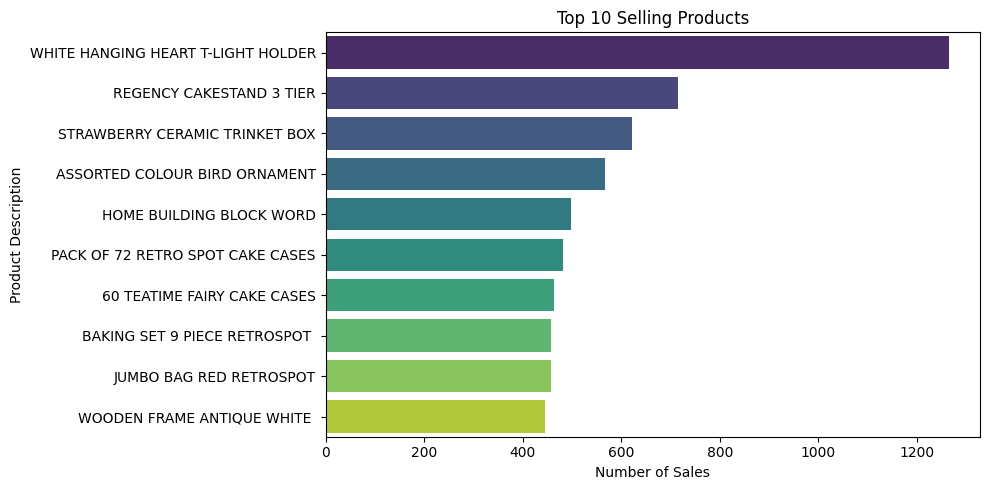

In [136]:
#Top 10 selling products
top_products = df['Product_Title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Number of Sales')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

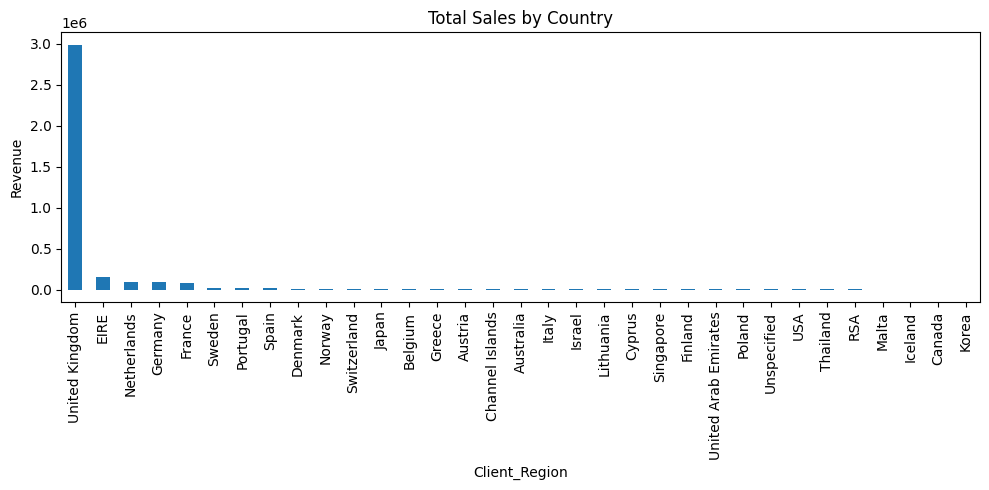

In [137]:
# Sales by country
country_sales = df.groupby('Client_Region')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
country_sales.plot(kind='bar')
plt.title('Total Sales by Country')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [138]:
print(df.columns.tolist())


['Transaction_ID', 'Product_Code', 'Product_Title', 'Units_Sold', 'Transaction_Timestamp', 'Unit_Cost', 'Client_ID', 'Client_Region', 'TotalPrice']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14212\346224500.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['TotalPrice'].sum()


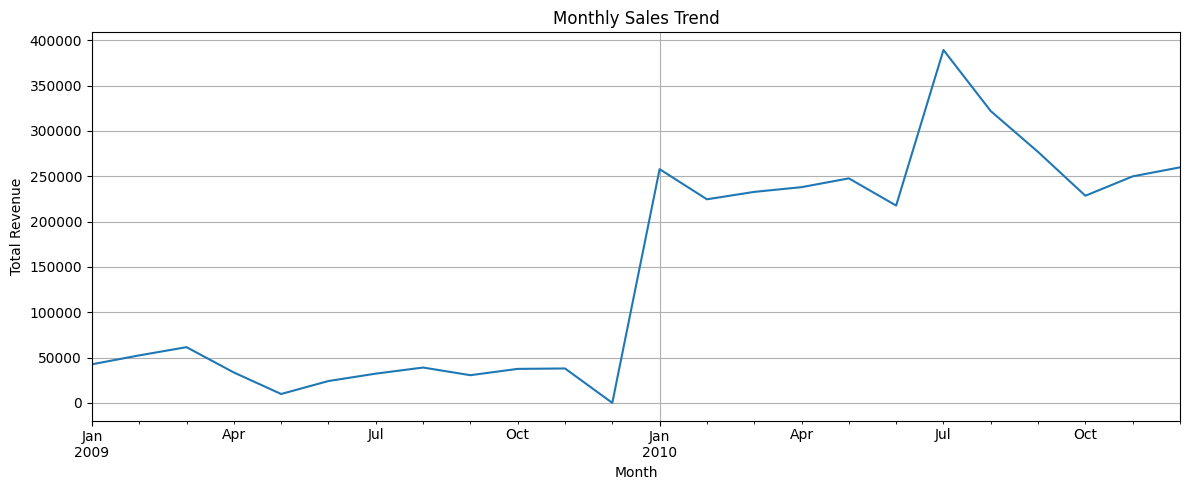

In [139]:
df['Transaction_Timestamp'] = pd.to_datetime(df['Transaction_Timestamp'])
df.set_index('Transaction_Timestamp', inplace=True)
monthly_sales = df.resample('M')['TotalPrice'].sum()

monthly_sales.plot(figsize=(12,5))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
df.columns

Index(['Transaction_ID', 'Product_Code', 'Product_Title', 'Units_Sold',
       'Unit_Cost', 'Client_ID', 'Client_Region', 'TotalPrice'],
      dtype='object')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14212\967691762.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  customer_orders = df.groupby('Client_ID').resample('M').size()


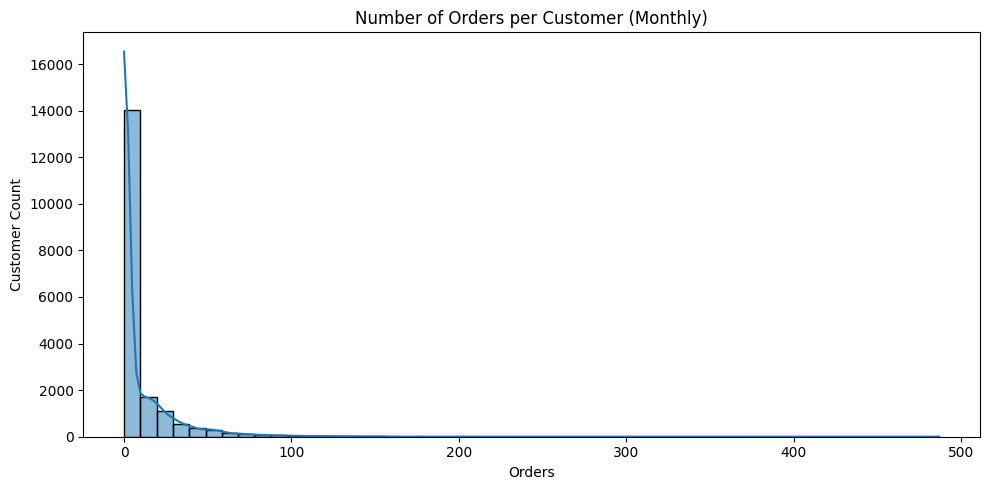

In [141]:
# Orders per Customer
customer_orders = df.groupby('Client_ID').resample('M').size()
plt.figure(figsize=(10,5))
sns.histplot(customer_orders, bins=50, kde=True)
plt.title('Number of Orders per Customer (Monthly)')
plt.xlabel('Orders')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()

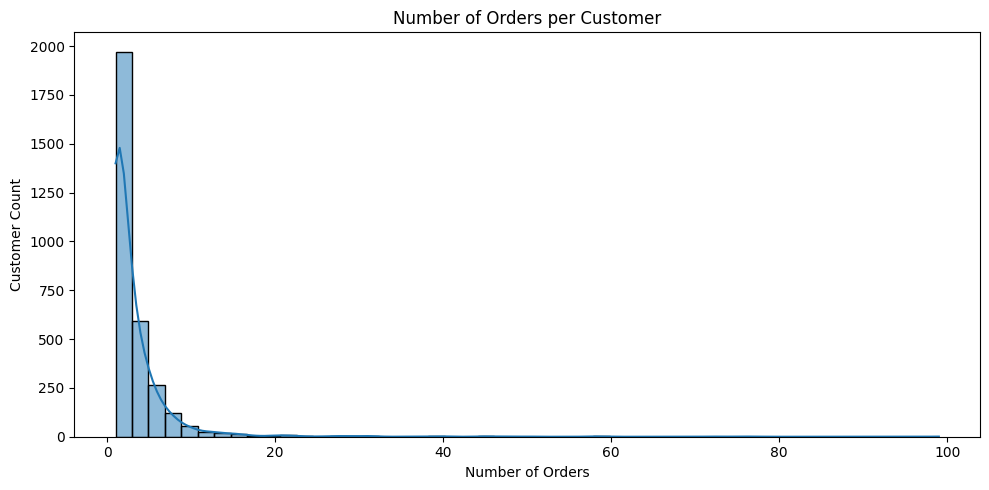

In [142]:
customer_orders = df.groupby('Client_ID')['Transaction_ID'].nunique()
plt.figure(figsize=(10,5))
sns.histplot(customer_orders, bins=50, kde=True)
plt.title('Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()

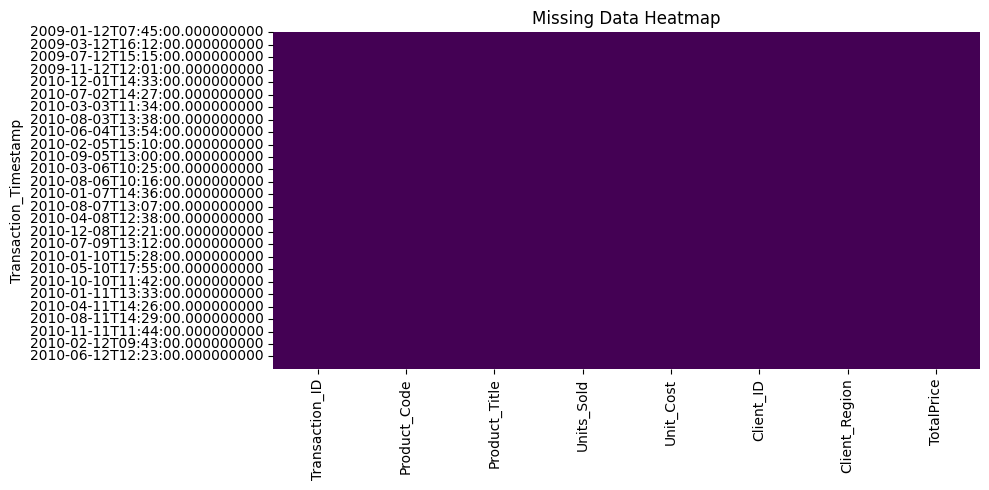

In [143]:
# Heatmap of missing values (if any remain)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

In [144]:
# Elbow Method to find optimal clusters
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)

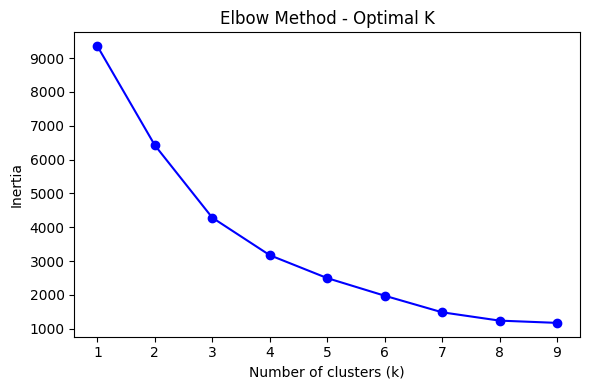

In [145]:
# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal K')
plt.tight_layout()
plt.show()

In [151]:
# Apply KMeans (choose k=4 for example)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

In [152]:
missing = [col for col in ['Recency', 'Monetary', 'Segment'] if col not in rfm.columns]
print("Missing columns:", missing)


Missing columns: ['Recency', 'Monetary']


In [157]:
# Visualize segments
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments (based on Recency & Monetary)')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.show()

ValueError: Could not interpret value `Recency` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [154]:
print(rfm.columns)


Index(['Transaction_Timestamp', 'Transaction_ID', 'TotalPrice', 'Segment'], dtype='object')


In [155]:
# Optional: View segment-wise stats
print(rfm.groupby('Segment').mean().round(2))

         Transaction_Timestamp  Transaction_ID  TotalPrice
Segment                                                   
0                       335.40            1.39      366.74
1                        78.81            3.20      951.27
2                         4.33           51.83    90009.63
3                        10.56           26.94    12786.49


In [290]:
print(df.columns)

Index(['Transaction_ID', 'Product_Code', 'Product_Title', 'Units_Sold',
       'Unit_Cost', 'Client_ID', 'Client_Region', 'TotalPrice'],
      dtype='object')


In [73]:
# Create target variable: Purchase (1) if Units_Sold > 0
df['Purchase'] = (df['Units_Sold'] > 0).astype(int)

In [74]:
# Encode categorical features
le_product = LabelEncoder()
le_title = LabelEncoder()
le_region = LabelEncoder()

df['Product_Code'] = le_product.fit_transform(df['Product_Code'])
df['Product_Title'] = le_title.fit_transform(df['Product_Title'])
df['Client_Region'] = le_region.fit_transform(df['Client_Region'])

In [75]:
# Feature set
X = df[['Product_Code', 'Product_Title', 'Unit_Cost', 'Client_ID', 'Client_Region']]
y = df['Purchase']


In [76]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9689597813818095
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.12      0.15       748
           1       0.98      0.99      0.98     32918

    accuracy                           0.97     33666
   macro avg       0.58      0.55      0.57     33666
weighted avg       0.96      0.97      0.97     33666



In [79]:
# Create pivot table: Clients as rows, Products as columns
user_product_matrix = df.pivot_table(index='Client_ID', 
                                     columns='Product_Title', 
                                     values='Units_Sold', 
                                     aggfunc='sum',
                                     fill_value=0)

In [80]:
# Compute cosine similarity between products
product_similarity = cosine_similarity(user_product_matrix.T)
product_similarity_df = pd.DataFrame(product_similarity, 
                                     index=user_product_matrix.columns, 
                                     columns=user_product_matrix.columns)

In [81]:
# 🔍 Recommendation Function
def recommend_products(product_name, top_n=10):
    if product_name not in product_similarity_df.columns:
        return f" Product '{product_name}' not found in dataset!"
    similarity_scores = product_similarity_df[product_name].sort_values(ascending=False)
    recommendations = similarity_scores.iloc[1:top_n+1]
    return recommendations

# 🧪 Example Usage
example_product = product_similarity_df.columns[0] 
print(f"\nTop 5 recommendations for: {example_product}")
print(recommend_products(example_product, top_n=5))


Top 5 recommendations for: 0
Product_Title
3695    0.619876
3091    0.609872
1640    0.533281
3002    0.510035
1303    0.445358
Name: 0, dtype: float64


In [82]:
# Aggregate total units sold per Product_Code over the sequence of transactions
df['Transaction_Index'] = df.groupby('Product_Code').cumcount()
grouped = df.groupby(['Product_Code', 'Transaction_Index'])['Units_Sold'].sum().reset_index()

In [83]:
# Pick a specific product to forecast
product_code = grouped['Product_Code'].unique()[0]  # you can choose any
product_sales = grouped[grouped['Product_Code'] == product_code]

In [84]:
# Prepare data for forecasting
X = product_sales[['Transaction_Index']]
y = product_sales['Units_Sold']


In [85]:
# Split for training and testing
split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [86]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Predict
y_pred = model.predict(X_test)

In [88]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 78.35


In [89]:
# Forecast next 10 transactions
future_index = np.arange(X['Transaction_Index'].max() + 1, X['Transaction_Index'].max() + 11).reshape(-1, 1)
future_prediction = model.predict(future_index)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


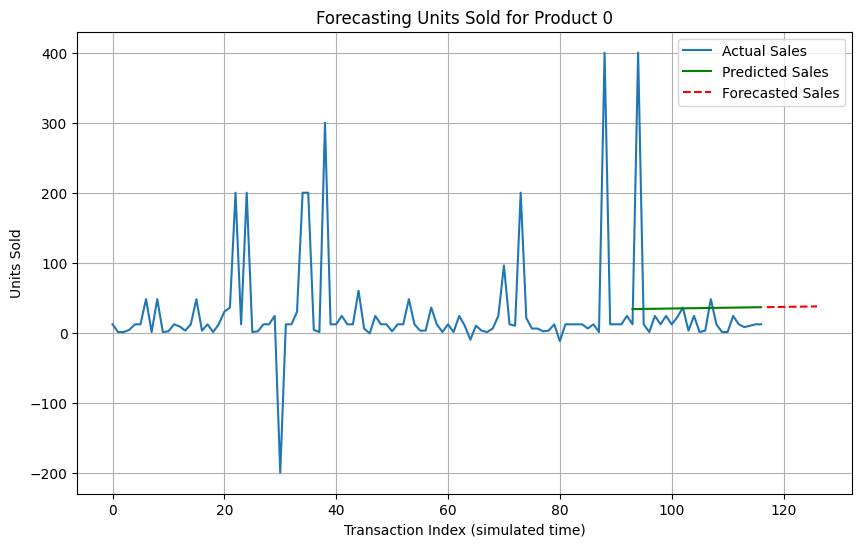

In [90]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(X['Transaction_Index'], y, label='Actual Sales')
plt.plot(X_test, y_pred, color='green', label='Predicted Sales')
plt.plot(future_index, future_prediction, color='red', linestyle='--', label='Forecasted Sales')
plt.title(f'Forecasting Units Sold for Product {product_code}')
plt.xlabel("Transaction Index (simulated time)")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.show()

In [91]:
df.columns

Index(['Transaction_ID', 'Product_Code', 'Product_Title', 'Units_Sold',
       'Unit_Cost', 'Client_ID', 'Client_Region', 'TotalPrice', 'Purchase',
       'Transaction_Index'],
      dtype='object')

In [92]:
# Step 4: Drop Irrelevant Columns (if any)
# Transaction_ID and Transaction_Index are IDs, not needed for training
df = df.drop(columns=['Transaction_ID', 'Transaction_Index'])

In [93]:
# Step 5: Encode Categorical Columns
categorical_cols = ['Product_Code', 'Product_Title', 'Client_ID', 'Client_Region']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [94]:
# Step 6: Define Features and Target
X = df.drop(columns=['TotalPrice'])  # Features
y = df['TotalPrice']    

In [95]:
# Step 7: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Step 8: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
# Step 9: Make Predictions
y_pred = model.predict(X_test)

In [98]:
# Step 10: Evaluate the Model
print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))



Mean Absolute Error: 0.7213327627280121
Mean Squared Error: 1781.1502152233857
R-squared Score: 0.7867521524157739


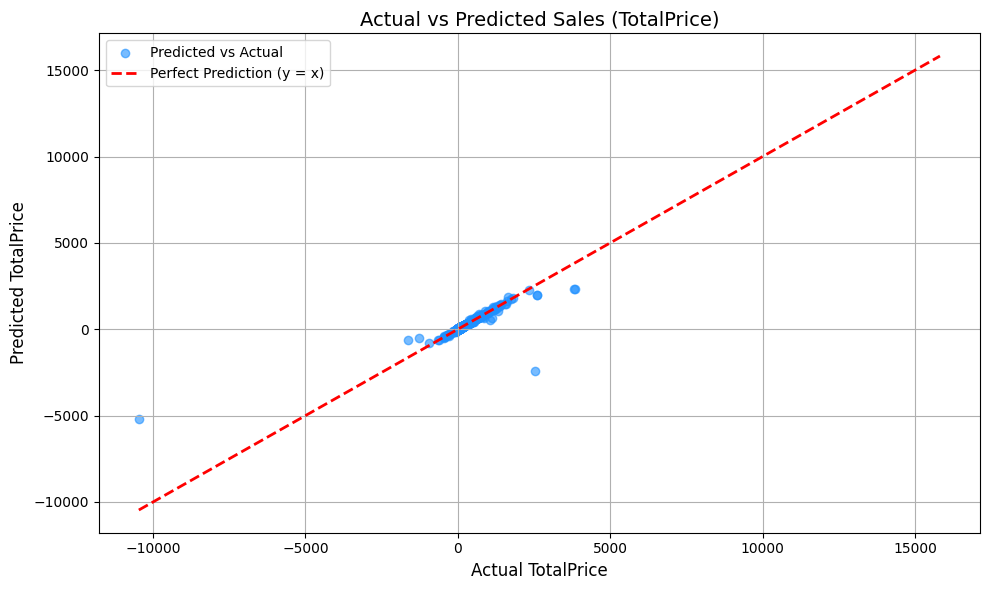

In [99]:
# Step 11: Plot Actual vs Predicted Sales
plt.figure(figsize=(10,6))

# Scatter plot of predictions
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', label='Predicted vs Actual')

# Diagonal line (perfect prediction)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction (y = x)')

# Labels and title
plt.xlabel('Actual TotalPrice', fontsize=12)
plt.ylabel('Predicted TotalPrice', fontsize=12)
plt.title('Actual vs Predicted Sales (TotalPrice)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
